In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data() 

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
y_label_train=y_label_train.reshape(-1)
y_label_test=y_label_test.reshape(-1)

In [6]:
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3) labels: (50000,)
test  data: images: (10000, 32, 32, 3)  labels: (10000,)


In [7]:
x_train_normalize = x_img_train.astype('float32') / 255.0
x_test_normalize = x_img_test.astype('float32') / 255.0

In [8]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_label_train)
y_test_onehot = utils.to_categorical(y_label_test)

In [9]:
print("train data:",'images:',x_train_normalize.shape,
      " labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ,
      " labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras import Input
from tensorflow.keras import Model

In [11]:
inputs = Input(shape=(32, 32, 3), name='input_layer')

x = Conv2D(filters=32,kernel_size=(3,3),
       input_shape=(32, 32,3), 
       activation='relu',padding='same')(inputs)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), 
     activation='relu', padding='same')(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

In [12]:
model =Model(inputs,outputs,name='CifarCNNFunc')

In [13]:
print(model.summary())

Model: "CifarCNNFunc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)             

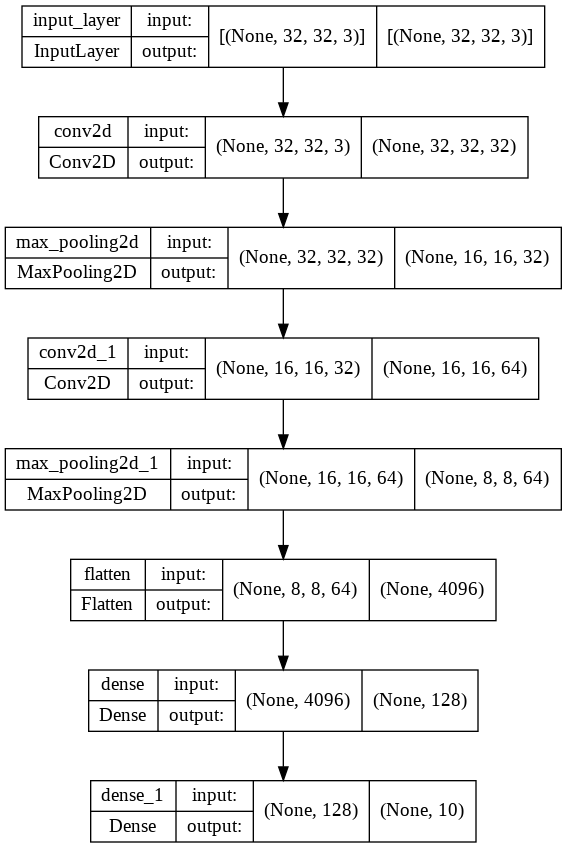

In [14]:
tf.keras.utils.plot_model(model, 'CifarCNNFunc.png', show_shapes=True)

# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy',
       optimizer='adam', metrics=['acc'])

In [16]:
train_history=model.fit(x_train_normalize, y_train_onehot,
            validation_split=0.2,
            epochs=10, batch_size=200, verbose=1)          

Epoch 1/10
200/200 [==============================] - 14s 11ms/step - loss: 1.6241 - acc: 0.4171 - val_loss: 1.3779 - val_acc: 0.5064
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 1.2470 - acc: 0.5609 - val_loss: 1.1639 - val_acc: 0.6021
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 1.1100 - acc: 0.6109 - val_loss: 1.1062 - val_acc: 0.6158
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 1.0118 - acc: 0.6463 - val_loss: 1.0363 - val_acc: 0.6391
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.9391 - acc: 0.6740 - val_loss: 0.9996 - val_acc: 0.6484
Epoch 6/10
200/200 [==============================] - 2s 8ms/step - loss: 0.8835 - acc: 0.6916 - val_loss: 1.0115 - val_acc: 0.6522
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.8421 - acc: 0.7049 - val_loss: 0.9341 - val_acc: 0.6767
Epoch 8/10
200/200 [==============================] - 2s 9ms/step - loss: 

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

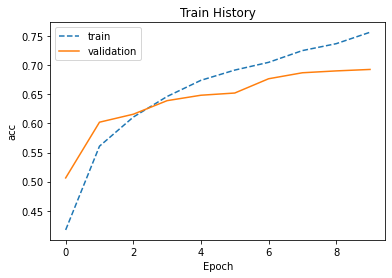

In [18]:
show_train_history(train_history,'acc','val_acc')

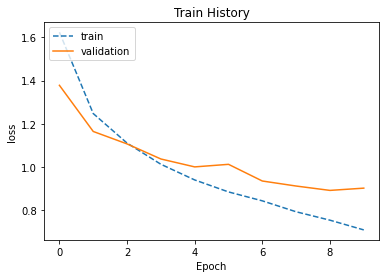

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_test_normalize,y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.9096 - acc: 0.6956


In [21]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.9095946550369263 test_acc= 0.6955999732017517


# 進行預測

In [22]:
probability=model.predict(x_test_normalize)

In [23]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [24]:
prediction[:10]

array([3, 1, 0, 0, 6, 6, 1, 6, 3, 1])

# 查看預測結果

In [25]:
import matplotlib.pyplot as plt 

In [26]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [27]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

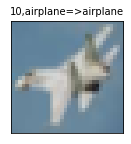

In [28]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,idx=10,num=1)

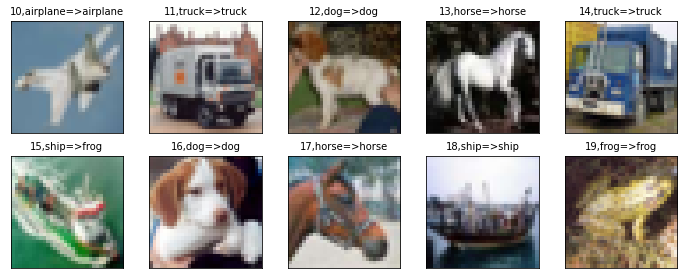

In [29]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=10)

# 查看預測機率

In [30]:
def show_predicted_probability(
    images,
    labels,
    prediction,
    probability,
    idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  print('label:',label_dict[labels[idx]],
     'predict:',label_dict[prediction[idx]]) 
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

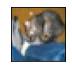

label: cat predict: cat
airplane   Probability:0.001561471
automobile Probability:0.000192722
bird       Probability:0.009992036
cat        Probability:0.776575923
deer       Probability:0.001098639
dog        Probability:0.147096440
frog       Probability:0.006838966
horse      Probability:0.003215938
ship       Probability:0.052709121
truck      Probability:0.000718785


In [31]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,0) 

# confusion matrix

In [32]:
import pandas as pd

In [33]:
pd.crosstab(y_label_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,783,21,41,15,8,9,12,23,40,48
1,30,777,10,9,3,10,7,16,13,125
2,79,3,582,34,95,71,55,60,8,13
3,22,10,109,420,76,191,83,72,4,13
4,29,2,99,40,659,34,34,92,7,4
5,17,2,73,116,47,607,27,102,5,4
6,5,3,60,34,65,29,781,19,1,3
7,11,1,34,18,37,50,6,840,0,3
8,104,39,18,13,15,13,11,19,728,40


In [34]:
df = pd.DataFrame({'label':y_label_test, 'predict':prediction})

In [35]:
df[:5]

,label,predict
0,3,3
1,8,1
2,8,0
3,0,0
4,6,6


In [36]:
df[(df.label==5)&(df.predict==3)]

,label,predict
158,5,3
230,5,3
232,5,3
238,5,3
321,5,3
...,...,...
9446,5,3
9586,5,3
9649,5,3
9657,5,3


# 查看預測錯誤資料

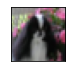

label: dog predict: horse
airplane   Probability:0.002159683
automobile Probability:0.000397528
bird       Probability:0.020442694
cat        Probability:0.333786011
deer       Probability:0.002646020
dog        Probability:0.176627994
frog       Probability:0.000301209
horse      Probability:0.442135692
ship       Probability:0.000080414
truck      Probability:0.021422707


In [37]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,42)

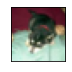

label: dog predict: dog
airplane   Probability:0.024380475
automobile Probability:0.001953926
bird       Probability:0.026763903
cat        Probability:0.228367224
deer       Probability:0.013342441
dog        Probability:0.384776622
frog       Probability:0.316766798
horse      Probability:0.003566090
ship       Probability:0.000060907
truck      Probability:0.000021675


In [38]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,128)